# **_Two Looks at the Matrix Pseudoinverse:_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This notebook demonstrates concepts from lessons/challenges I studied in Mike X. Cohen's Linear Algebra course on Udemy.

This is basically my homework, where I attempt to work through/review what I learned and to and have a future quick-reference as time passes...

Please visit Dr. Cohen's course here, it's fantastic and has helped keep me on-track toward my goal of contributing to the AI Safety conversation:

-   Udemy course: https://www.udemy.com/course/linear-algebra-theory-and-implementation

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Diminished Rank Matrices, the Pseudoinverse and One-Sided Multiplication:_**

### **_Intro/Background on the Matrix Inverse:_**

#### **_The Inverse and `1`:_**

A matrix can only have an inverse under two conditions:

1.  The matrix is square.

2.  The matrix is full-rank.

A (full-rank, square) matrix multiplied by its inverse (on either side) produces the **IDENTITY MATRIX**.

-   The identity matrix is square and has `1`'s along the diagonal and `0`'s for non-diagonal elements.

-   The identity matrix is the matrix equivalent of `1` for a simple multiplication equation...

-   So multiplying a matrix by the identity matrix will produce that same matrix, as multiplying a single number by `1` will produce that same number:

$$
\LARGE
    \begin{gathered}
        \textcolor{royalblue}{127} \times \textcolor{gold}{1} = \textcolor{forestgreen}{127} \\ \Downarrow \quad \Downarrow \quad \Downarrow \quad \Downarrow \\
        \textcolor{royalblue}
        {\begin{bmatrix}
            1 & 5 \\
            17 & 13
        \end{bmatrix}}

        \textcolor{gold}
        {\begin{bmatrix}
            1 & 0 \\
            0 & 1
        \end{bmatrix}}

        =

        \textcolor{forestgreen}
        {\begin{bmatrix}
            1 & 5 \\
            17 & 13
        \end{bmatrix}}
    \end{gathered}
$$    

In [2]:
import numpy as np

num = 127
one = 1
print(f"{num} * {one} = {num * one}")

print()

M = np.array([[1, 5], [17, 13]])
ID = np.array([[1, 0], [0, 1]])
print(f"{M}\n@\n{ID}\n=\n{M @ ID}")

127 * 1 = 127

[[ 1  5]
 [17 13]]
@
[[1 0]
 [0 1]]
=
[[ 1  5]
 [17 13]]


<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

#### **_One-Sided Matrix Multiplication:_**

If a matrix is not invertible, but has full-column or full-row rank, we can use a **ONE-SIDED** inverse (full-column: left-inverse; full-row: right-inverse) to produce an identity matrix.

The one-sided inverse takes advantage of the fact that we can begin with a full-column/tall matrix or a full-row/wide matrix, multiply it by its transpose, and produce a square, full-rank matrix.

Let's drill down on the _left-inverse_ of a tall, full-column matrix.

The formula for the **LEFT**-inverse uses square matrices produced by the original matrix left-multiplied by its transpose, inverting one of these products and isolating the original matrix on the right:

<font color=orangered>

**_Formula for the Matrix Left-Inverse:_**

</font>

$$
\large
    (A^T A)^{-1}
    \quad
    (A^T A)
    = I_n
$$

$$
\large
    (A^T A)^{-1}
    \quad
    A^T A
    = I_n
$$

$$
\Huge
    \textcolor{orangered}{(A^T A)^{-1} A^T}
    \quad
    A = I_n
$$

Note the dimensionality (the $n$ in $I_n$) of the product identity matrix!

The matrix's left-inverse allows us to produce an identity matrix by multiplying that original matrix from the **LEFT**, but it's important to note that the dimensions of that identity matrix are $n \times n$, where the original matrix was $m \times n$.

We've produced an identity matrix, but its size is determined by the number of columns in the original matrix: $n \times n$.

With an invertible matrix we'd have multiplied by its inverse and produced an identity matrix of _identical_ dimensionality.

Since our matrix is _not_ invertible, we've adapted: taking a full-column rank/tall matrix, left-multiplying it by its left-inverse, and producing an identity matrix of dimensionality $n \times n$.

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

#### **_The Matrix Pseudoinverse + Questions:_**

Now for the matrix **PSEUDOINVERSE**, which will multiply a rank-deficient matrix and produce an approximation of the identity matrix.

I'm not yet deep into the formula for creating the matrix **PSEUDOINVERSE**, but am learning about some of its properties:

In the case of a square, full-rank matrix, we can substitute the left-inverse with the pseudoinverse and it will return the identity matrix.

We also can right-multiply a square, full-rank matrix by its pseudoinverse to get the identity matrix.

But what happens when the matrix rank diminishes and it is singular, when the matrix is no longer invertible?

A matrix is rank-deficient when its rows or columns become linearly dependent, leaving it without a true inverse...

For rank-deficient matrices, does left or right multiplication by the pseudoinverse approximate the identity matrix, or does the approximation deteriorate significantly?

How do the results differ when left-multiplying and right-multiplying a diminishing rank square matrix by its one-sided inverses?

To better understand, we can visualize the process with [**matplotlib**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)'s `imshow()` method.

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

### **_Code:_**

In [10]:
# Import libraries:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [11]:
def display_row_title(fig, grid, row_title, rank, max_rank):
    """Formats a sub-title for a GridSpec row."""
    row = fig.add_subplot(grid)
    row.set_title(
        f"{row_title}\n",
        fontweight='semibold',
        size=max_rank * 7,
        color=(1 - rank / max_rank, 0, rank / max_rank),
    )
    row.set_frame_on(False)
    row.axis('off')

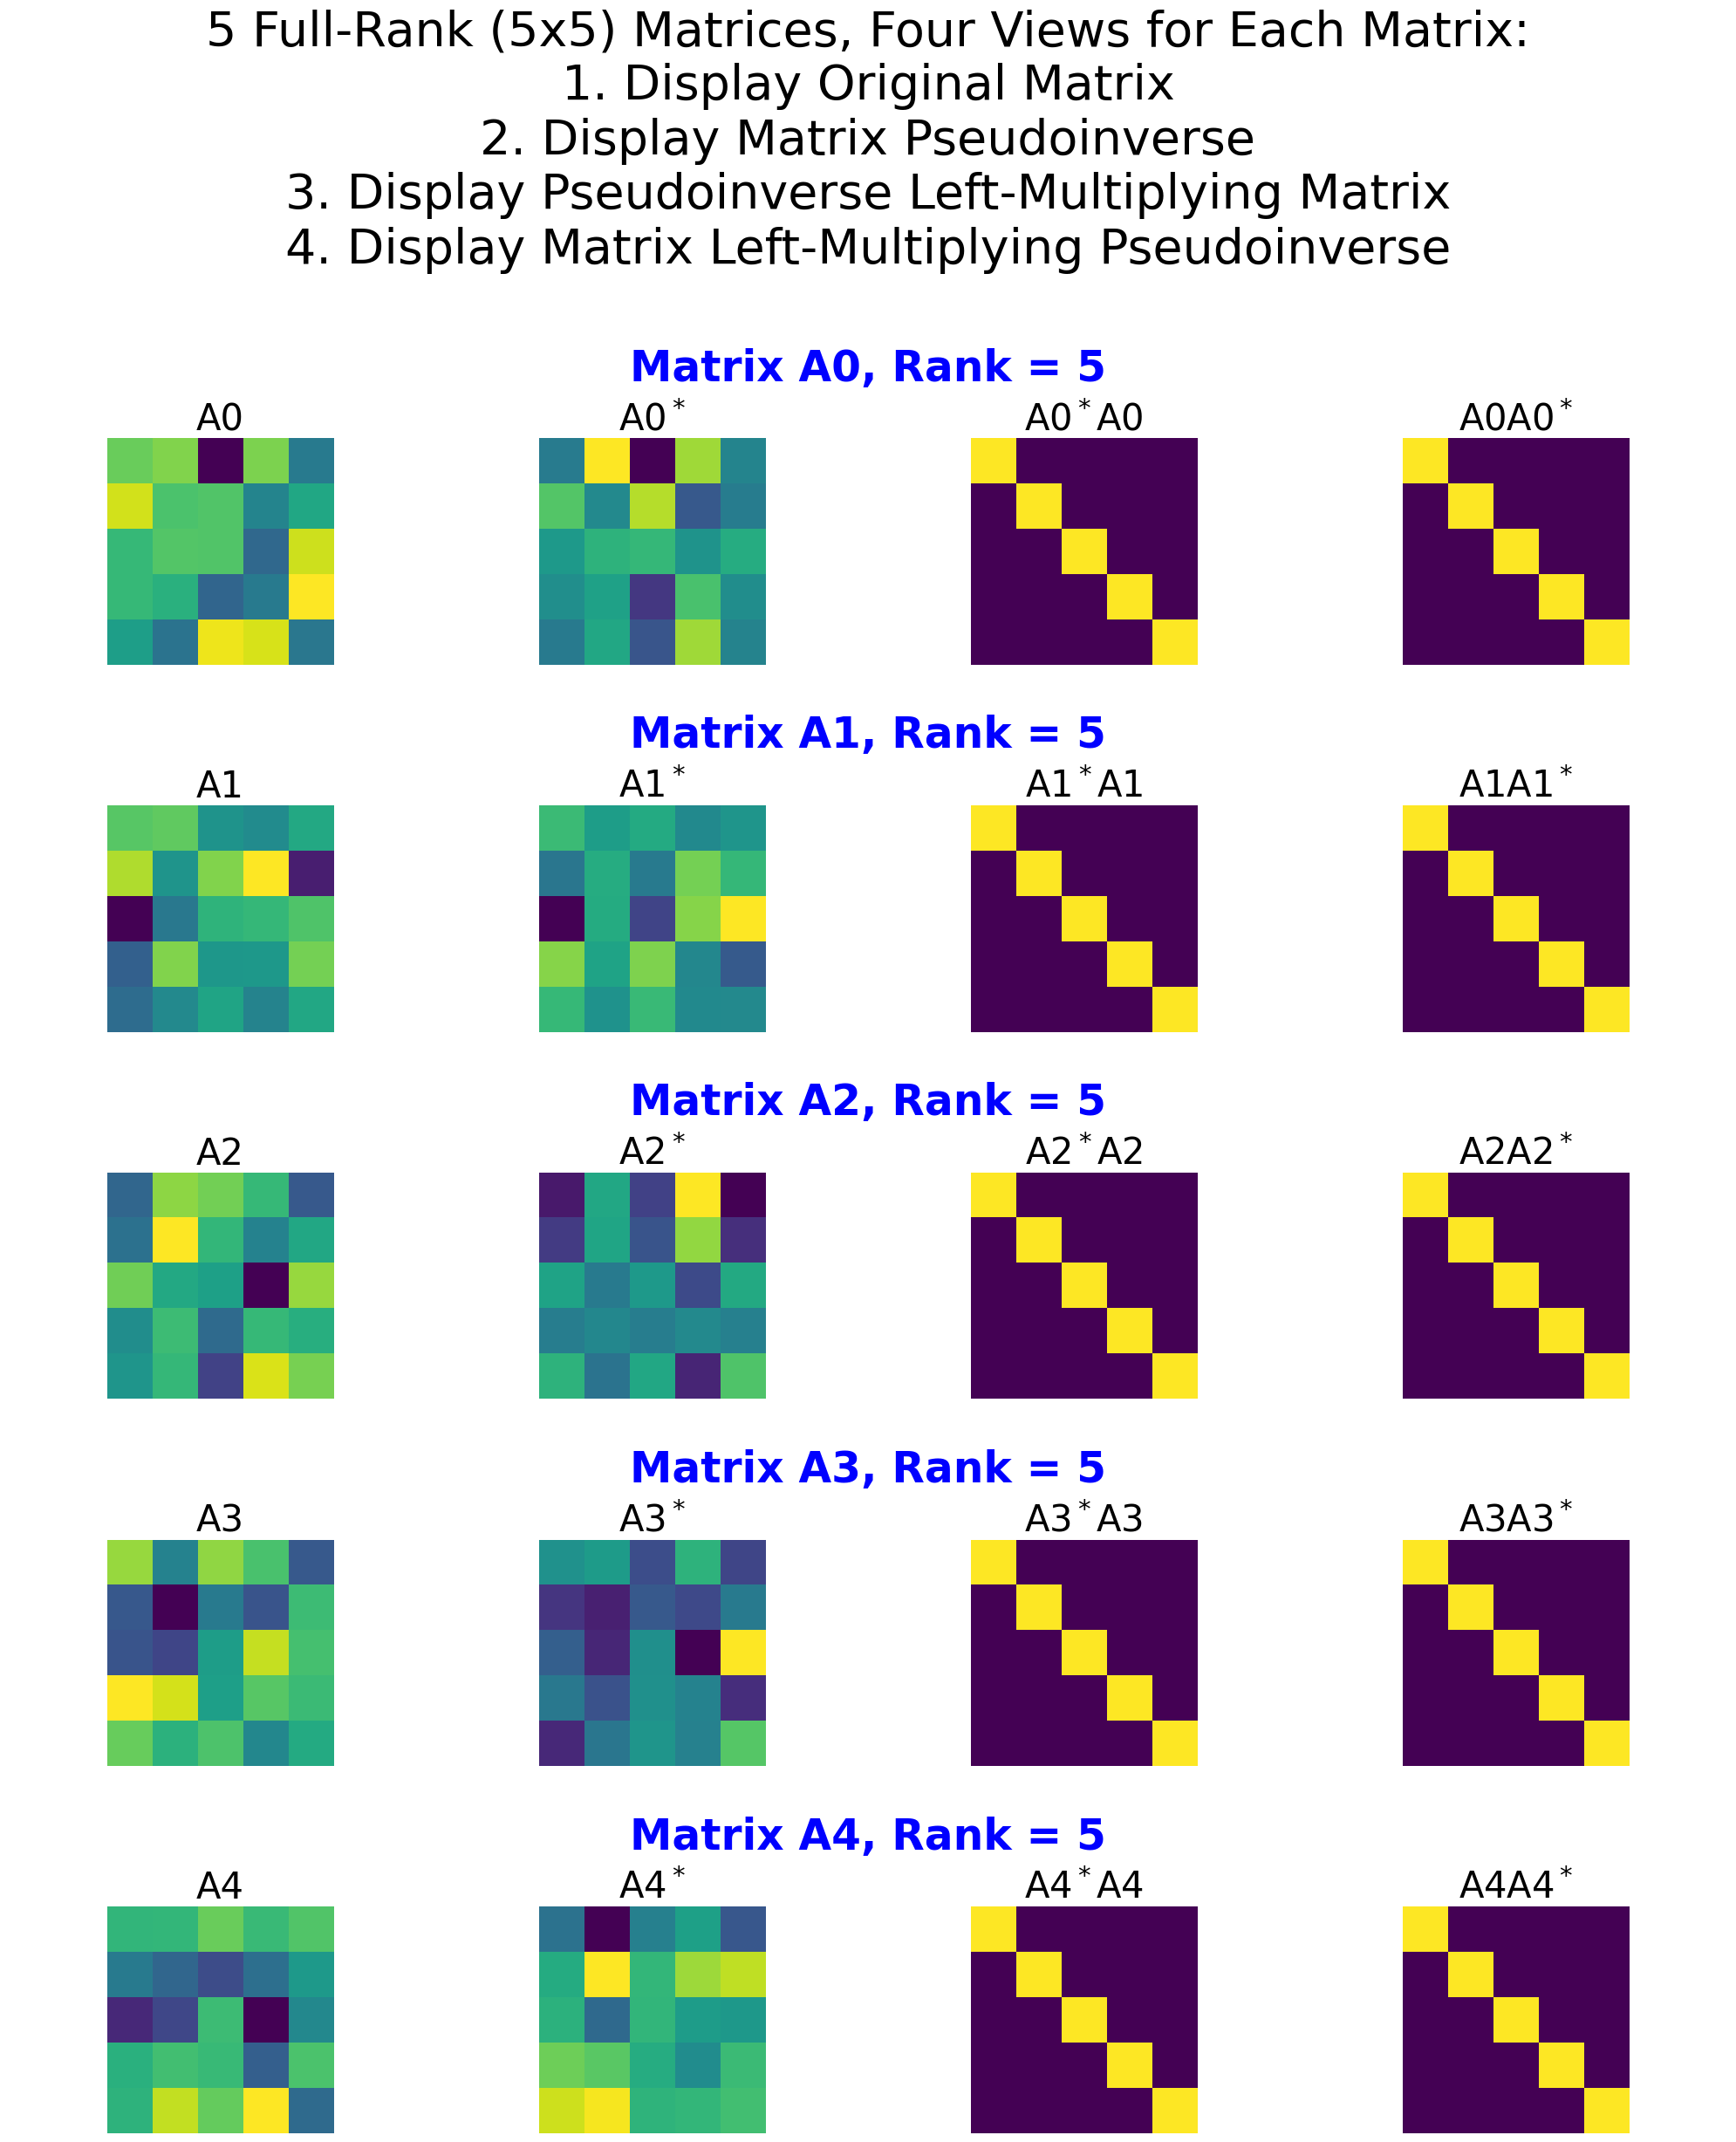

In [12]:
# Matrix dimensions/number of tests to run:
n = 5
fig = plt.figure(figsize=(n * 4, n**2))
gs = GridSpec(n, 4, figure=fig)

for i in range(n):
    A = np.random.randn(n, n)

    # Display original matrix:
    ax0 = fig.add_subplot(gs[i, 0])
    ax0.imshow(A), ax0.axis('off')
    ax0.set_title(f"A{i}", size=n * 6)

    # Display original matrix multiplied by its pinv:
    ax1 = fig.add_subplot(gs[i, 1])
    ax1.imshow(np.linalg.pinv(A)), ax1.axis('off')
    ax1.set_title(f"A{i}$^*$", size=n * 6)

    # Left-multiply A by A* and display:
    ax2 = fig.add_subplot(gs[i, 2])
    ax2.imshow(np.linalg.pinv(A) @ A), ax2.axis('off')
    ax2.set_title(f"A{i}$^*$A{i}", size=n * 6)

    # Right-multiply A by A* and display:
    ax3 = fig.add_subplot(gs[i, 3])
    ax3.imshow(A @ np.linalg.pinv(A)), ax3.axis('off')
    ax3.set_title(f"A{i}A{i}$^*$", size=n * 6)

    # Calculate matrix rank, blue/red indicates fuller/lesser rank:
    mat_rank = np.linalg.matrix_rank(A)
    display_row_title(fig, gs[i, :], f"Matrix A{i}, Rank = {mat_rank}", mat_rank, n)

# Create title indicating subject and methods:
title = f"{n} Full-Rank ({n}x{n}) Matrices, Four Views for Each Matrix:"
title += "\n1. Display Original Matrix"
title += "\n2. Display Matrix Pseudoinverse"
title += "\n3. Display Pseudoinverse Left-Multiplying Matrix"
title += f"\n4. Display Matrix Left-Multiplying Pseudoinverse{"\n" * (n // 4)}"
plt.suptitle(title, size=n * 8)

# Make room:
plt.tight_layout()
plt.show()

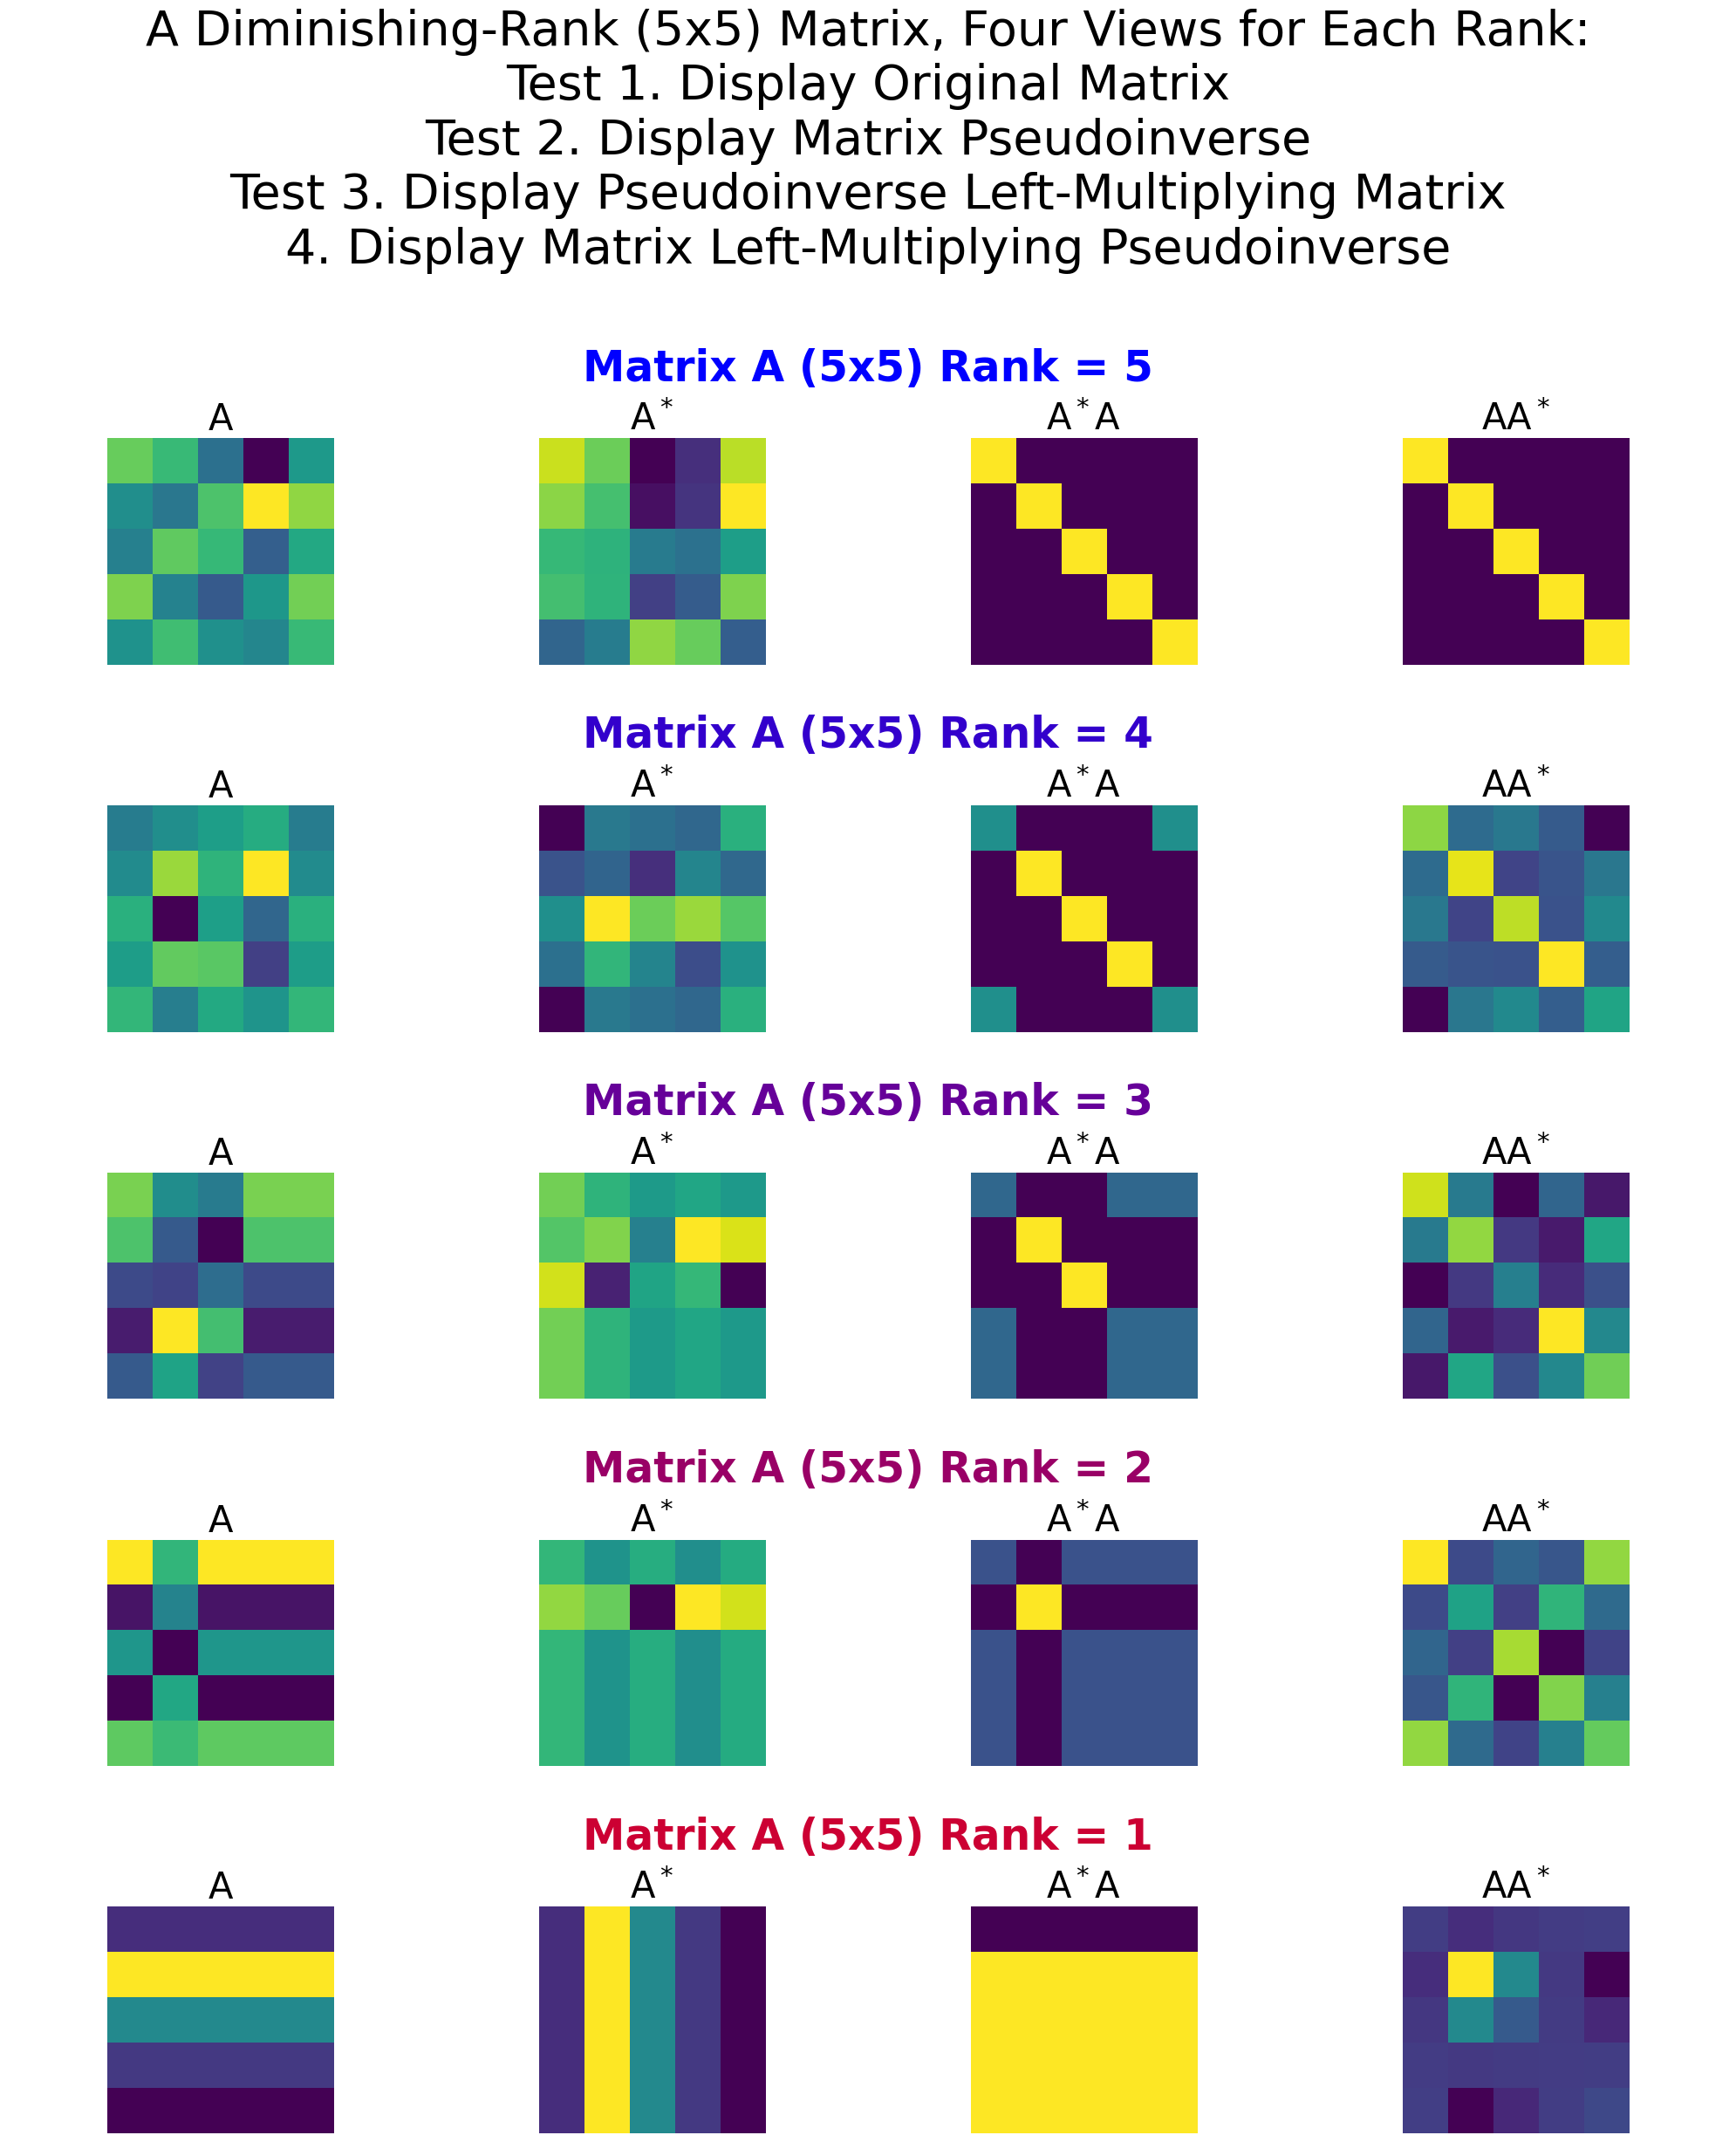

In [13]:
# Matrix dimensions/number of tests to run:
n = 5
fig = plt.figure(figsize=(n * 4, n**2))
gs = GridSpec(n, 4, figure=fig)

for i in range(n):
    A = np.random.randn(n, n)
    A_COPY = np.copy(A)
    A_COPY[:, n - i :] = A_COPY[:, [0]]

    # Display original matrix:
    ax0 = fig.add_subplot(gs[i, 0])
    ax0.imshow(A_COPY), ax0.axis('off')
    ax0.set_title("A", size=n * 6)

    # Display original matrix multiplied by its pinv:
    ax1 = fig.add_subplot(gs[i, 1])
    ax1.imshow(np.linalg.pinv(A_COPY)), ax1.axis('off')
    ax1.set_title("A$^*$", size=n * 6)

    # Left-multiply A by A*:
    ax2 = fig.add_subplot(gs[i, 2])
    ax2.imshow(np.linalg.pinv(A_COPY) @ A_COPY), ax2.axis('off')
    ax2.set_title("A$^*$A", size=n * 6)

    # Right-multiply A by A*:
    ax3 = fig.add_subplot(gs[i, 3])
    ax3.imshow(A_COPY @ np.linalg.pinv(A_COPY)), ax3.axis('off')
    ax3.set_title("AA$^*$", size=n * 6)

    # Calculate matrix rank, blue/red indicates fuller/lesser rank:
    mat_rank = np.linalg.matrix_rank(A_COPY)
    display_row_title(fig, gs[i, :], f"Matrix A ({n}x{n}) Rank = {mat_rank}", mat_rank, n)

# Build title:
title = f"A Diminishing-Rank ({n}x{n}) Matrix, Four Views for Each Rank:"
title += "\nTest 1. Display Original Matrix"
title += "\nTest 2. Display Matrix Pseudoinverse"
title += "\nTest 3. Display Pseudoinverse Left-Multiplying Matrix"
title += f"\n4. Display Matrix Left-Multiplying Pseudoinverse{"\n" * (n // 4)}"
plt.suptitle(title, size=n * 8)

# Space for everybody:
plt.tight_layout()
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

### **_Analysis:_**

-  `A.T A` and `A A.T` are used to create the formulas for the matrix <font color="orangered"> **LEFT-INVERSE** </font> and <font color="dodgerblue">**RIGHT-INVERSE**</font>:

$$
\Large
    \textcolor{orangered}{(A^T A)^{-1} A^T}
    \quad
    A = I_n
$$

$$
\Large
    A \quad
    \textcolor{dodgerblue}{A^T(A A^T)^{-1}}
    = I_m
$$

-   For a full-rank matrix, the pseudoinverse and the matrix left-inverse and right-inverse are the same as `A.T A` and `A A.T` are the same...

#### **_Takeaway..._**

-   As rank decreases, `A.T A` and `A A.T` become less similar, leading to greater asymmetry in left vs. right pseudoinverse multiplication results.

-   **RIGHT-MULTIPLICATION** remains a blurry approximation of the identity matrix, whereas **LEFT-MULTIPLICATION** eventually results in a sparse matrix before _collapsing_ into zeros.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Invertible Matrices: Comparing the Inverse and Pseudoinverse:_**

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [15]:
def inv_vs_pseudoinv(err_places):
    # Define variable matrix size bounds for testing on variety of n's:
    lower, upper = 2, 10
    n = np.random.randint(lower, upper)

    # Full-rank, square, invertible matrix:
    M = np.random.randn(n, n)
    # Compute the inverse:
    M_INV = np.linalg.inv(M)
    # Compute the pseudoinverse:
    M_PINV = np.linalg.pinv(M)

    # Check multiplications by original matrix produces identity matrices:
    NP_ID = np.eye(n)  # Compare with built-in method
    Q_ID_INV = M @ M_INV
    Q_ID_PINV = M @ M_PINV
    inv_id = np.allclose(NP_ID, Q_ID_INV, atol=10**(-err_places))
    pinv_id = np.allclose(NP_ID, Q_ID_PINV, atol=10**(-err_places))

    # Check if matrices are equal through subtraction, seeing if non-zeros:
    Q_ALL_ZEROS = np.round(M_INV - M_PINV, err_places)
    all_zeros = np.all(Q_ALL_ZEROS == 0)

    # Check all conditions. If any untrue, print culprits:
    if not (inv_id and pinv_id and all_zeros):
        print("Zeros matrices subtraction returns:")
        display(sym.sympify(Q_ALL_ZEROS))
        return False
    else:
        return True

In [16]:
num_tests = 5
error_places = 12

for i in range(num_tests):
    if inv_vs_pseudoinv(error_places):
        print(f"...test #{i + 1}: Inv and PInv match.")
    else:
        print(f"...test #{i + 1}: Inv and PInv not a match.")
    print()

...test #1: Inv and PInv match.

...test #2: Inv and PInv match.

...test #3: Inv and PInv match.

...test #4: Inv and PInv match.

...test #5: Inv and PInv match.



#### **_Takeaway:_**

We took square, full-rank matrices and computed the inverse via `np.linalg.inv()` and the pseudoinverse with `np.linalg.pinv()`.

Within a $10^{-12}$ degree of precision, the matrix inverse and pseudoinverse consistently return the same result.

Early days for me, Dr. Cohen's [**course**](https://www.udemy.com/course/linear-algebra-theory-and-implementation) indicates we'll learn more about this process in the section on Singular Value Decomposition...

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Not everything here is necessarily correct, as it's my attempt to review and work through the lesson material, so please let me know if you have any correction/suggestions._

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python-JS Web Development Porfolio: https://www.andrewblais.dev

</font>